In [23]:
### Create map of plööp

### IMPORT DATA ###

# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode
import numpy as np
from pyproj import CRS
import requests
import geojson
import matplotlib.pyplot as plt

## Read grid of the capital region into variable 'grid'
# File path
fp_grid = "data/MetropAccess_YKR_grid_EurefFIN.shp"

# Read in data
grid = gpd.read_file(fp_grid)

## Read population grid data for 2018 into a variable `pop`. 

# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format).
params = dict(service='WFS',
              version='2.0.0',
              request='GetFeature',
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018',
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

# Clean out unnecessary columns
pop = pop[["asukkaita", "geometry"]]

# Check if crs is correct and reproject crs to ETRS GK-25 if the crs is not defined correctly
if (pop.crs != "epsg:3879" or pop.crs == None):
    pop.set_crs(epsg=3879, inplace=True)

# Check the data
print(pop.head())


## Read buffer polygons that describe 200 m accessibility via pedestrian and bicycle ways from metro and train stations 

# Specify the url for web feature service
url_buff = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format).
params_buff = dict(service='WFS',
              version='2.0.0',
              request='GetFeature',
              typeName='200m_verkostobufferi',
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url_buff, params=params_buff)

# Create GeoDataFrame from geojson
buff = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

# Clean out unnecessary columns
buff = buff[["asema", "geometry"]]

# Check if crs is correct and reproject crs to ETRS GK-25 if the crs is not defined correctly
if (buff.crs != "epsg:3879" or buff.crs == None):
    buff.set_crs(epsg=3879, inplace=True)
    
# Clip out stations that are located outside the capital region
gpd.clip(buff, grid, keep_geom_type=False)

# Check the data
print(buff.head())

DriverError: exercises/exercise-4-KristiinaKoivu/data/MetropAccess_YKR_grid_EurefFIN.shp: No such file or directory

In [ ]:
### PROCESS DATA ###

# Create new column ''

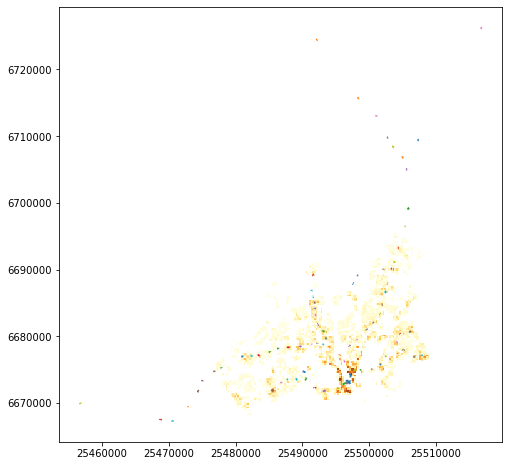

In [18]:
### PLOT DATA ###
# Create one subplot
fig, ax = plt.subplots(figsize=(12,8))

# Visualize 
pop.plot(ax=ax, column="asukkaita", cmap="YlOrBr", alpha=0.9)

buff.plot(ax=ax, column="asema")

# Disable scientific notation
ax.ticklabel_format(style='plain')
